https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
# Actual column is the target
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
# de Fahrenheit a Celsius y cambiar las unidades de 'actual'
def conversor(x):
    return (x-32)*(5/9)

features['actual'] = features['actual'].apply(conversor)
features['temp_2'] = features['temp_2'].apply(conversor)
features['temp_1'] = features['temp_1'].apply(conversor)
features['average'] = features['average'].apply(conversor)
features['forecast_noaa'] = features['forecast_noaa'].apply(conversor)
features['forecast_acc'] = features['forecast_acc'].apply(conversor)
features['forecast_under'] = features['forecast_under'].apply(conversor)
features['friend'] = features['friend'].apply(conversor)
   


In [3]:
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,7.222222,7.222222,7.555556,7.222222,6.111111,10.000000,6.666667,-1.666667
1,2016,1,2,Sat,6.666667,7.222222,7.611111,6.666667,5.000000,10.000000,6.666667,16.111111
2,2016,1,3,Sun,7.222222,6.666667,7.666667,5.000000,6.111111,7.777778,8.333333,13.333333
3,2016,1,4,Mon,6.666667,5.000000,7.722222,4.444444,6.666667,8.888889,7.777778,11.666667
4,2016,1,5,Tues,5.000000,4.444444,7.777778,6.666667,7.777778,7.777778,7.777778,5.000000


### 2. Lidia con las variables categóricas del dataset

In [4]:
# information
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    float64
 5   temp_1          348 non-null    float64
 6   average         348 non-null    float64
 7   actual          348 non-null    float64
 8   forecast_noaa   348 non-null    float64
 9   forecast_acc    348 non-null    float64
 10  forecast_under  348 non-null    float64
 11  friend          348 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 32.8+ KB


In [5]:
# One-hot encode the data using pandas get_dummies
# No hace falta evitar la colinealidad
features = pd.get_dummies(features)

# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,7.555556,7.222222,6.111111,10.000000,6.666667,-1.666667,1,0,0,0,0,0,0
1,7.611111,6.666667,5.000000,10.000000,6.666667,16.111111,0,0,1,0,0,0,0
2,7.666667,5.000000,6.111111,7.777778,8.333333,13.333333,0,0,0,1,0,0,0
3,7.722222,4.444444,6.666667,8.888889,7.777778,11.666667,0,1,0,0,0,0,0
4,7.777778,6.666667,7.777778,7.777778,7.777778,5.000000,0,0,0,0,0,1,0


In [7]:
# info de las features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    float64
 4   temp_1          348 non-null    float64
 5   average         348 non-null    float64
 6   actual          348 non-null    float64
 7   forecast_noaa   348 non-null    float64
 8   forecast_acc    348 non-null    float64
 9   forecast_under  348 non-null    float64
 10  friend          348 non-null    float64
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

### 3. Divide en train y test

In [8]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features 
# axis 1 refers to the columns
features=  features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split (features, labels, test_size = 0.25,
                                                                            random_state = 42)

In [10]:

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 42)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [12]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error Train:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error Train: 0.0 degrees.


In [13]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error Test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error Test: 3.1 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

print('MAPE:', round(np.mean(mape), 2), '%.')

MAPE: 19.32 %.


In [15]:
mape

array([ 32.35294118,   6.89655172,   5.        ,   5.88235294,
         5.26315789,  38.        ,  18.86792453,  19.23076923,
         9.09090909,  35.        ,  24.13793103,  20.75471698,
        33.33333333,   9.09090909,   2.7027027 ,  23.33333333,
         3.125     ,   4.16666667,   9.52380952,  19.14893617,
         0.        ,   8.        ,  11.42857143,  20.        ,
        18.51851852,  33.33333333,  18.18181818,  35.        ,
        44.11764706,   2.27272727,  53.125     ,  10.34482759,
        50.        ,  18.36734694,   8.88888889,  44.        ,
        11.53846154,  46.66666667,   2.77777778,  63.15789474,
        37.77777778,  16.66666667,   9.75609756,  52.63157895,
         7.40740741,  23.63636364,  11.53846154,  12.24489796,
        26.92307692,  20.        ,  23.52941176,  50.        ,
         6.06060606,   6.25      ,  13.15789474,  12.12121212,
         9.52380952,  32.        ,   9.52380952,  14.28571429,
        20.        ,   5.88235294,  33.33333333,   2.70

### 7. Representa el árbol de decision

In [16]:
import matplotlib
matplotlib.__version__

'3.2.2'

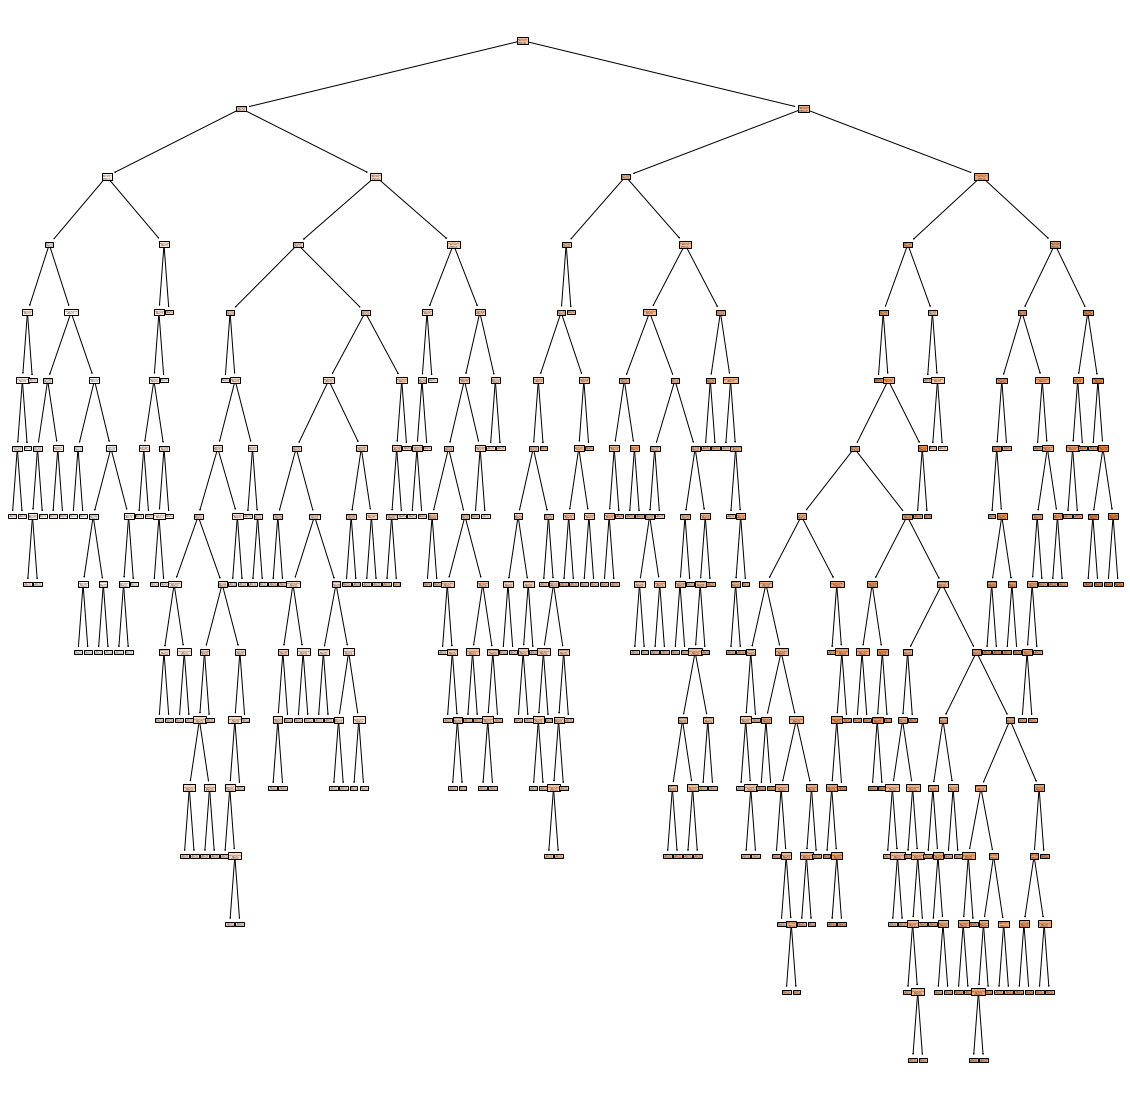

In [18]:
# dibujamos el árbol
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=42)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular su MAE

In [22]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error Train:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error Train: 2.04 degrees.


In [23]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error Test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error Test: 2.39 degrees.


### 10. Vuelve a representar su árbol

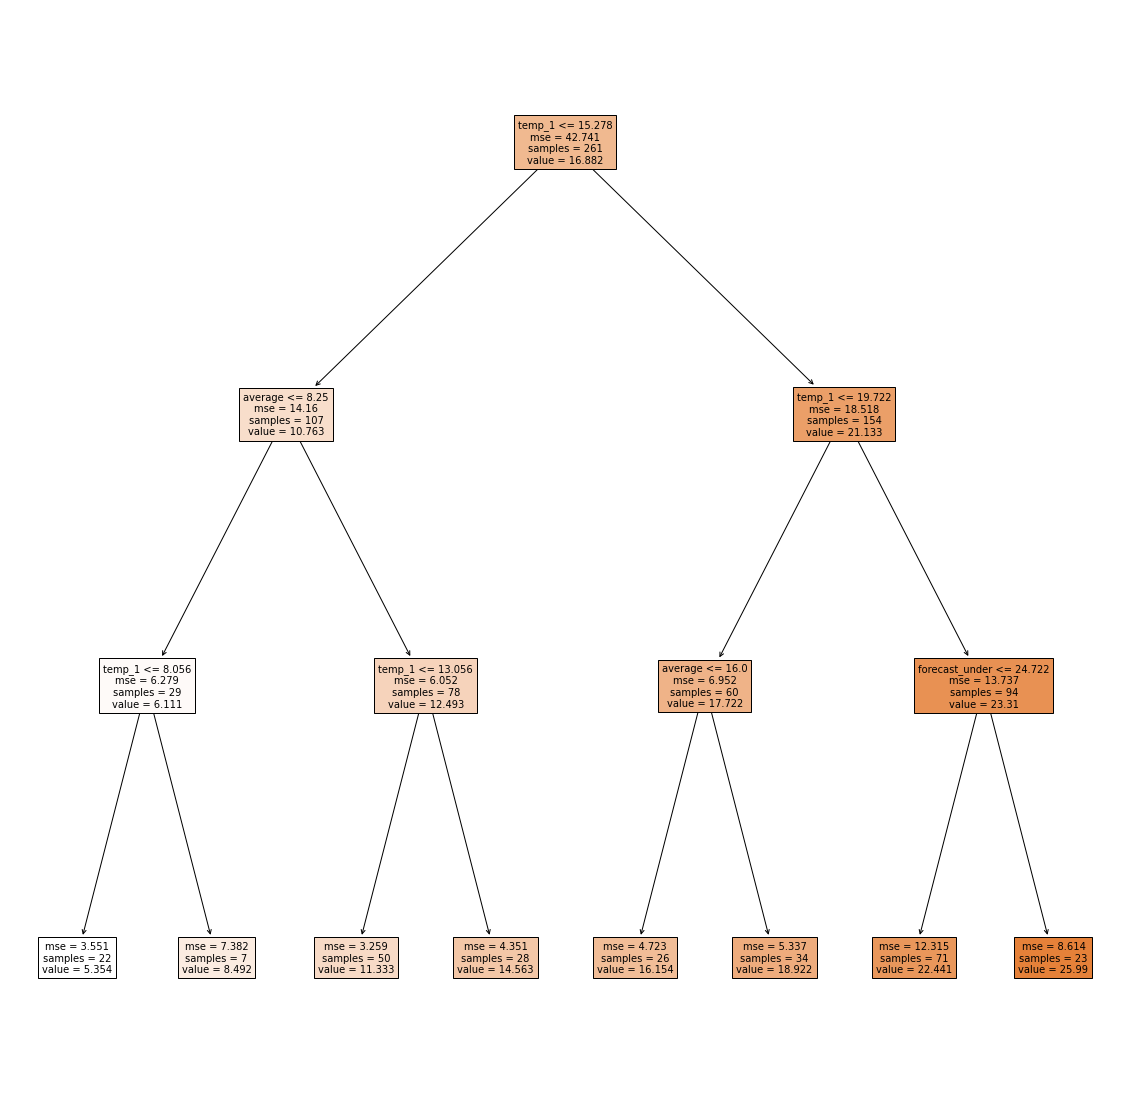

In [24]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [25]:
np.sum(dtr.feature_importances_) # todas las importancias

1.0000000000000002

In [26]:
import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.103995
8,forecast_under,0.023367
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000
